<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab: 
1. Secara sederhana K-nearest neighbors atau knn adalah algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (train data sets), yang diambil dari k tetangga terdekatnya (nearest neighbors). Dengan k merupakan banyaknya tetangga terdekat.<br>
2.   - Sangat sensitif terhadap data pencilan (outlier).
    - jika k-nya genap, algoritma memiliki kelemahan misalkan label dari tetangga terdekat jumlahnya sama.
    - Tidak menangani nilai hilang (missing value) secara implisit.
    - Rentan terhadap variabel yang non-informatif.
    - Rentan terhadap dimensionalitas yang tinggi.

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

Uniform Score :


[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance Score :


[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

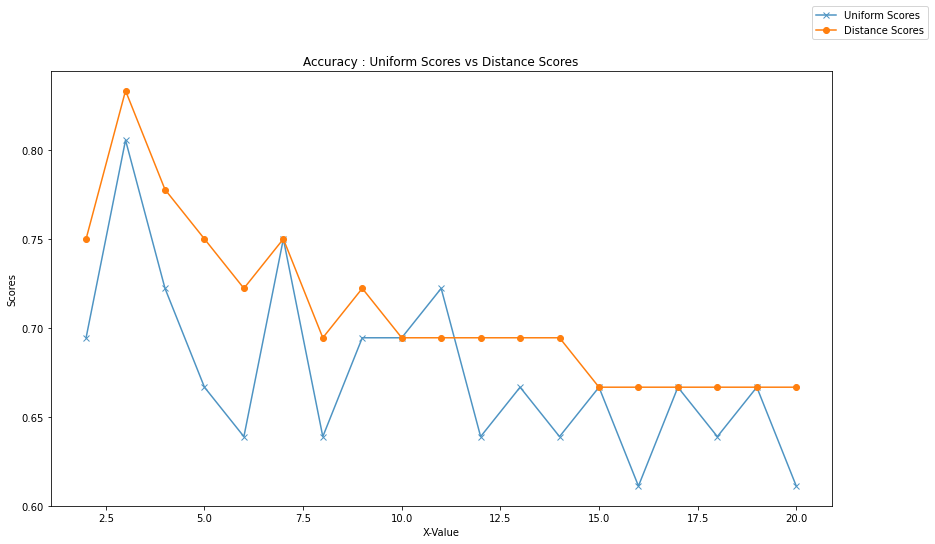

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

# T = range(2,21)
T = np.arange(2,21)
list_uniform_score=[]
list_distance_score=[]
def kkn_predict(k,weight):
    neigh = KNeighborsClassifier(n_neighbors=k, weights=weight)
    neigh.fit(X_train, y_train)
    score=neigh.score(X_test,y_test)
    return score
for i in range (2,21):
    score_u=kkn_predict(i,'uniform')
    score_d=kkn_predict(i,'distance')
    list_uniform_score.append(score_u)
    list_distance_score.append(score_d)
print('Uniform Score :')
display(list_uniform_score)
print('Distance Score :')
display(list_distance_score)

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(T,list_uniform_score, marker='x',label='Uniform Scores', color='#4e94c3')
ax.plot(T,list_distance_score, marker='o', label = 'Distance Scores',color='#ff7f0e')

plt.legend(loc=1, bbox_to_anchor=(1.13, 1.16))
ax.set_xlabel('X-Value')
ax.set_ylabel('Scores')
ax.set_title('Accuracy : Uniform Scores vs Distance Scores')
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [117]:
import numpy as np
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X,y)
y_predict=model_lr.predict(X)
print('Nilai parameter koefisien :',model_lr.coef_)
print('Nilai parameter intercept :',model_lr.intercept_)

Nilai parameter koefisien : [ 1.5 -5.   9.  10. ]
Nilai parameter intercept : 0.5000000016247412
